In [19]:
from simple_abc import basic_abc, Model
import pylab as plt
import numpy as np
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [13]:
class MyModel(Model):
    
    def __init__(self):
        pass
    
    def draw_theta(self):
        mu = stats.uniform.rvs(-2,4)
        sigma = stats.uniform.rvs(0.01,2)
        
        return mu,sigma
    
    def generate_data(self, theta):
        return stats.norm.rvs(loc=theta[0],scale=theta[1],size=100)
    
    def summary_stats(self, data):
        per25 = np.mean(data)
        per75 = np.std(data)
        
        return (per25,per75)
    
    def distance_function(self, data, synth_data):

        return np.sqrt((data[0]-synth_data[0])**2 + (data[1]-synth_data[1])**2)


In [14]:
mu_real, sig_real = 0.5, 1.4
model = MyModel()
data = stats.norm.rvs(loc=mu_real, scale=sig_real, size=1000)


In [21]:
FMU,FSIG = [],[]
eps = [0.1, 0.05, 0.01]
for e in eps:
    posterior, distances, accepted_count, trial_count, epsilon = basic_abc(model, data, min_particles=100,epsilon=e)
    mu = [x[0] for x in posterior]
    sig = [x[1] for x in posterior]
    fmu = stats.gaussian_kde(mu)
    fsig = stats.gaussian_kde(sig)
    FMU.append(fmu)
    FSIG.append(fsig)
    

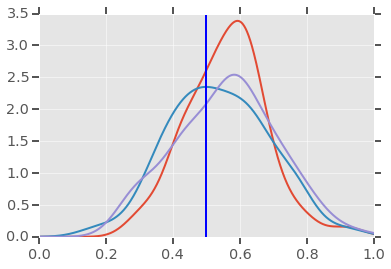

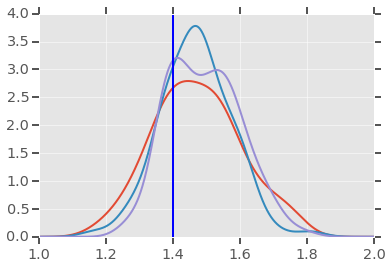

In [22]:
xmu = plt.arange(0,1,0.001)
xsig = plt.arange(1,2,0.001)
for F in FMU:
    plt.plot(xmu,F(xmu),'-')
    plt.axvline(mu_real)
plt.figure()
for F in FSIG:
    plt.plot(xsig,F(xsig),'-')
    plt.axvline(sig_real)